#TAG SMART EMAIL  

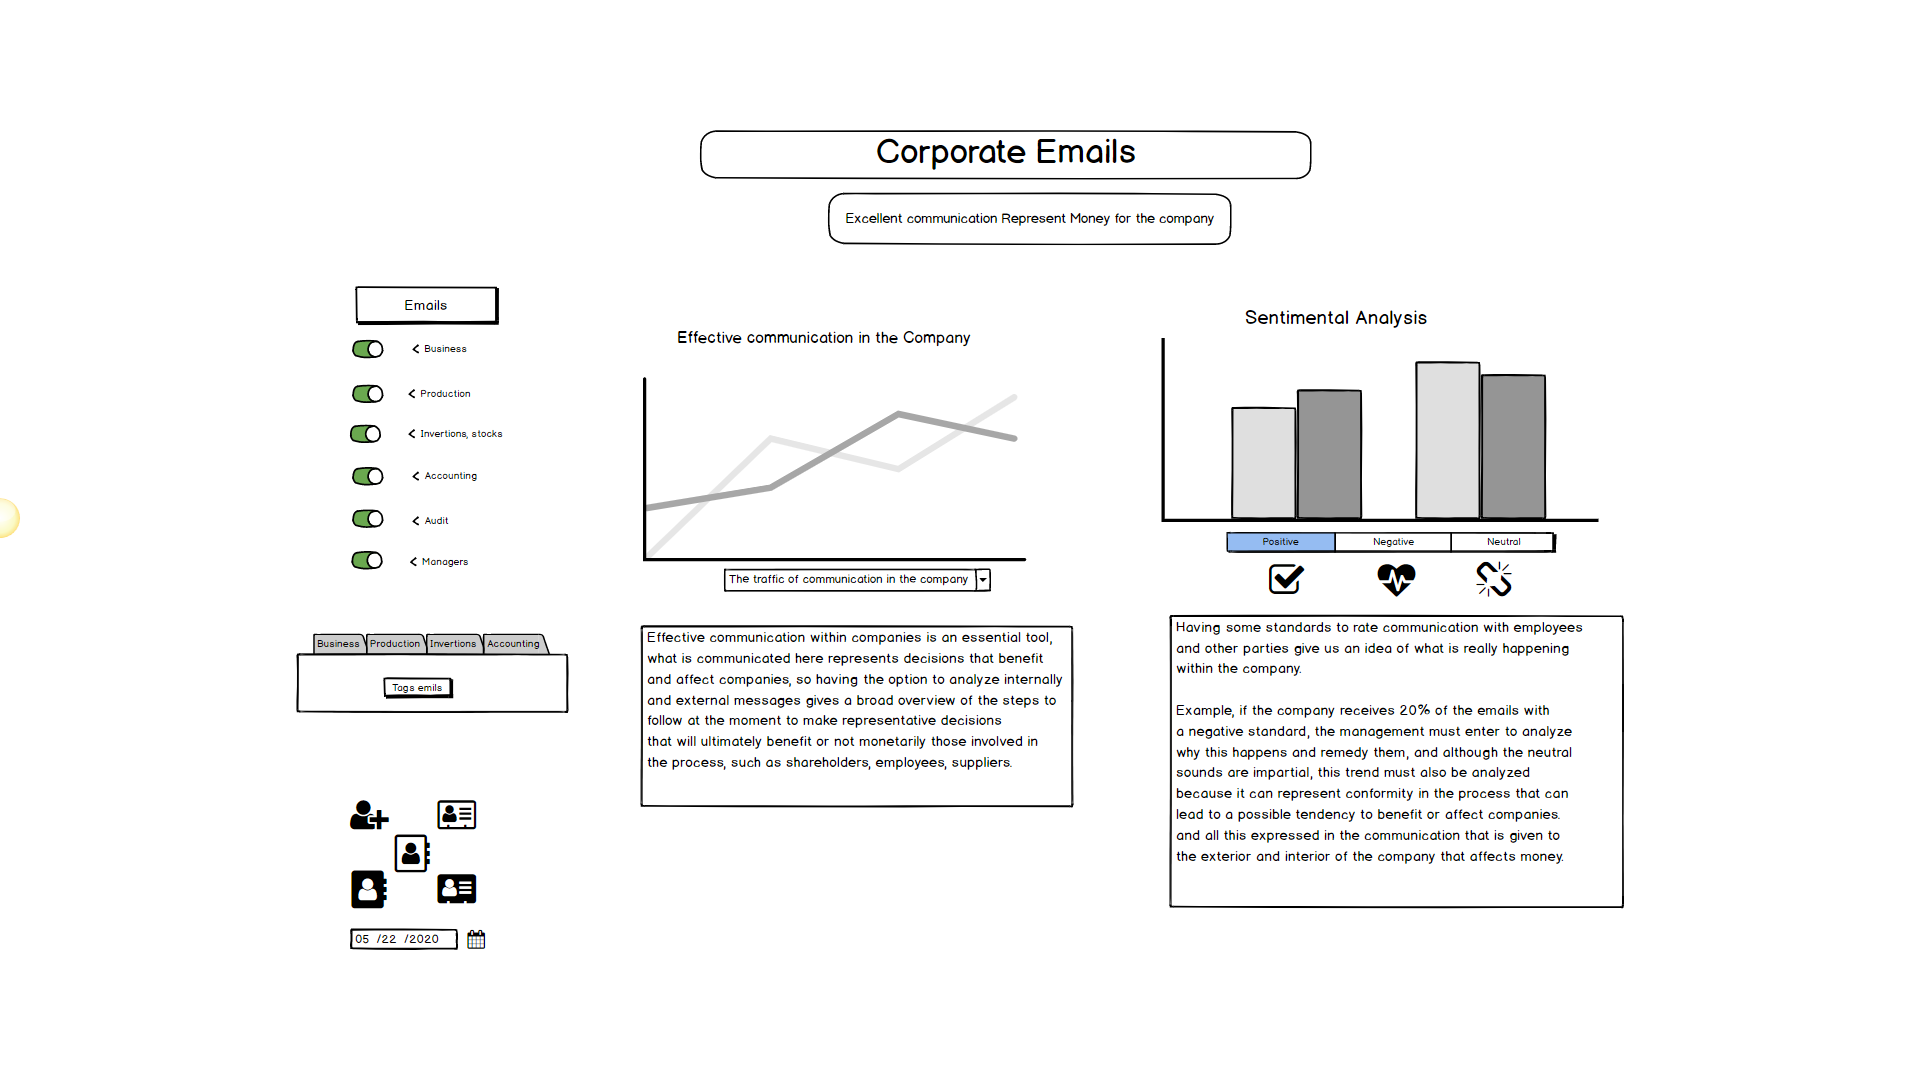

In [0]:
from PIL import Image
# load the image
schema = Image.open('scheme.png')
schema

In [194]:
!pip install vaderSentiment

In [195]:
#import Library
import pandas as pd
import string
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [196]:
import requests
url = 'https://raw.githubusercontent.com/Moly-malibu/Tag-Smart-Emails/master/Enronemails.csv?token=AN2RW2CBCCKBZJNKYW7S4NK64D6TM'
myfile = requests.get(url)
open('email.csv', 'wb').write(myfile.content)

24004915

In [197]:
#EMAILS FROM ENRON COMPANY SAMPLING
df = pd.read_csv("email.csv").drop(['Unnamed: 0'], axis=1)
print(df.shape) 
df.head(7)

(10000, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...


In [198]:
 df.index

RangeIndex(start=0, stop=10000, step=1)

In [199]:
[s.strip() for s in df['message'][100].splitlines()]

['Message-ID: <15940494.1075855689309.JavaMail.evans@thyme>',
 'Date: Wed, 16 Aug 2000 05:35:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: cooper.richey@enron.com',
 'Subject: Re:',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: Cooper Richey',
 'X-cc:',
 'X-bcc:',
 "X-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen.nsf',
 '',
 "I tried the new address but I don't have access.  also, what do I need to",
 'enter under domain?']

In [0]:
emails = ' '.join([s.strip() for s in df['message'][1].splitlines()][15:])

In [201]:
from nltk.tokenize import word_tokenize

#Split into words
tokens = word_tokenize(emails)

#Convert to lower case
tokens = [w.lower() for w in tokens]

#Prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))

#Remove punctuation 
stripped = [re_punc.sub('', w) for w in tokens]

#Remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]

#Filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:200])

['traveling', 'business', 'meeting', 'takes', 'fun', 'trip', 'especially', 'prepare', 'presentation', 'would', 'suggest', 'holding', 'business', 'plan', 'meetings', 'take', 'trip', 'without', 'formal', 'business', 'meetings', 'would', 'even', 'try', 'get', 'honest', 'opinions', 'whether', 'trip', 'even', 'desired', 'necessary', 'far', 'business', 'meetings', 'think', 'would', 'productive', 'try', 'stimulate', 'discussions', 'across', 'different', 'groups', 'working', 'often', 'presenter', 'speaks', 'others', 'quiet', 'waiting', 'turn', 'meetings', 'might', 'better', 'held', 'round', 'table', 'discussion', 'format', 'suggestion', 'go', 'austin', 'play', 'golf', 'rent', 'ski', 'boat', 'jet', 'ski', 'flying', 'somewhere', 'takes', 'much', 'time']


In [202]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(words)
bag_of_words = count_vec.transform(words)

print(count_vec.get_feature_names())

['austin', 'better', 'boat', 'business', 'desired', 'different', 'discussion', 'discussions', 'especially', 'far', 'flying', 'formal', 'format', 'fun', 'golf', 'groups', 'held', 'holding', 'honest', 'jet', 'meeting', 'meetings', 'necessary', 'opinions', 'plan', 'play', 'prepare', 'presentation', 'presenter', 'productive', 'quiet', 'rent', 'round', 'ski', 'speaks', 'stimulate', 'suggest', 'suggestion', 'table', 'takes', 'think', 'time', 'traveling', 'trip', 'try', 'turn', 'waiting', 'working']


In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
fitted = text.fit(words)
transformed = fitted.transform(words)
print ("Tags: ", words)

Tags:  ['traveling', 'business', 'meeting', 'takes', 'fun', 'trip', 'especially', 'prepare', 'presentation', 'would', 'suggest', 'holding', 'business', 'plan', 'meetings', 'take', 'trip', 'without', 'formal', 'business', 'meetings', 'would', 'even', 'try', 'get', 'honest', 'opinions', 'whether', 'trip', 'even', 'desired', 'necessary', 'far', 'business', 'meetings', 'think', 'would', 'productive', 'try', 'stimulate', 'discussions', 'across', 'different', 'groups', 'working', 'often', 'presenter', 'speaks', 'others', 'quiet', 'waiting', 'turn', 'meetings', 'might', 'better', 'held', 'round', 'table', 'discussion', 'format', 'suggestion', 'go', 'austin', 'play', 'golf', 'rent', 'ski', 'boat', 'jet', 'ski', 'flying', 'somewhere', 'takes', 'much', 'time']


In [204]:
idfreque = text.idf_
print(dict(zip(fitted.get_feature_names(), idfreque)))

{'across': 5.31748811353631, 'austin': 5.31748811353631, 'better': 5.31748811353631, 'boat': 5.31748811353631, 'business': 3.9311937524164198, 'desired': 5.31748811353631, 'different': 5.31748811353631, 'discussion': 5.31748811353631, 'discussions': 5.31748811353631, 'especially': 5.31748811353631, 'even': 4.624340932976365, 'far': 5.31748811353631, 'flying': 5.31748811353631, 'formal': 5.31748811353631, 'format': 5.31748811353631, 'fun': 5.31748811353631, 'get': 5.31748811353631, 'go': 5.31748811353631, 'golf': 5.31748811353631, 'groups': 5.31748811353631, 'held': 5.31748811353631, 'holding': 5.31748811353631, 'honest': 5.31748811353631, 'jet': 5.31748811353631, 'meeting': 5.31748811353631, 'meetings': 3.9311937524164198, 'might': 5.31748811353631, 'much': 5.31748811353631, 'necessary': 5.31748811353631, 'often': 5.31748811353631, 'opinions': 5.31748811353631, 'others': 5.31748811353631, 'plan': 5.31748811353631, 'play': 5.31748811353631, 'prepare': 5.31748811353631, 'presentation': 5

In [205]:
text.vocabulary_

{'across': 0,
 'austin': 1,
 'better': 2,
 'boat': 3,
 'business': 4,
 'desired': 5,
 'different': 6,
 'discussion': 7,
 'discussions': 8,
 'especially': 9,
 'even': 10,
 'far': 11,
 'flying': 12,
 'formal': 13,
 'format': 14,
 'fun': 15,
 'get': 16,
 'go': 17,
 'golf': 18,
 'groups': 19,
 'held': 20,
 'holding': 21,
 'honest': 22,
 'jet': 23,
 'meeting': 24,
 'meetings': 25,
 'might': 26,
 'much': 27,
 'necessary': 28,
 'often': 29,
 'opinions': 30,
 'others': 31,
 'plan': 32,
 'play': 33,
 'prepare': 34,
 'presentation': 35,
 'presenter': 36,
 'productive': 37,
 'quiet': 38,
 'rent': 39,
 'round': 40,
 'ski': 41,
 'somewhere': 42,
 'speaks': 43,
 'stimulate': 44,
 'suggest': 45,
 'suggestion': 46,
 'table': 47,
 'take': 48,
 'takes': 49,
 'think': 50,
 'time': 51,
 'traveling': 52,
 'trip': 53,
 'try': 54,
 'turn': 55,
 'waiting': 56,
 'whether': 57,
 'without': 58,
 'working': 59,
 'would': 60}

In [206]:
tags_dist = dict(zip(txt_fitted.get_feature_names(), idfreque))
tags_dist

{'across': 5.31748811353631,
 'austin': 5.31748811353631,
 'better': 5.31748811353631,
 'boat': 5.31748811353631,
 'business': 3.9311937524164198,
 'desired': 5.31748811353631,
 'different': 5.31748811353631,
 'discussion': 5.31748811353631,
 'discussions': 5.31748811353631,
 'especially': 5.31748811353631,
 'even': 4.624340932976365,
 'far': 5.31748811353631,
 'flying': 5.31748811353631,
 'formal': 5.31748811353631,
 'format': 5.31748811353631,
 'fun': 5.31748811353631,
 'get': 5.31748811353631,
 'go': 5.31748811353631,
 'golf': 5.31748811353631,
 'groups': 5.31748811353631,
 'held': 5.31748811353631,
 'holding': 5.31748811353631,
 'honest': 5.31748811353631,
 'jet': 5.31748811353631,
 'meeting': 5.31748811353631,
 'meetings': 3.9311937524164198,
 'might': 5.31748811353631,
 'much': 5.31748811353631,
 'necessary': 5.31748811353631,
 'often': 5.31748811353631,
 'opinions': 5.31748811353631,
 'others': 5.31748811353631,
 'plan': 5.31748811353631,
 'play': 5.31748811353631,
 'prepare': 5

In [207]:
import numpy as np

#Get feature:
feature_Tags = np.array(text.get_feature_names())
sorted_by_idf = np.argsort(text.idf_)
print("Features Tags low frequence:\n{}".format(feature_Tags[sorted_by_idf[:3]]))
print("\nFeatures Tags highest frequence:\n{}".format(feature_Tags[sorted_by_idf[-3:]]))

Features Tags low frequence:
['business' 'meetings' 'would']

Features Tags highest frequence:
['often' 'get' 'opinions']


##Sentimental Analysis

In [0]:
#CLEAN DATASET
import re
import html
def cleanup_html(raw_html):
    clean_html = re.sub(r'<.*?>', '', raw_html)
    clean_html_http = re.sub(r'http\S+([\.]{3})?', '', clean_html)
    clean_txt = html.unescape(clean_html)
    return clean_txt
df['rating'] = df['message'].apply(cleanup_html)

In [209]:
def cleanemail(email):
    return ' '.join([s.strip() for s in email.splitlines()][15:])

df['rating'] = df['message'].apply(cleanemail)
df["rating"].value_counts(sort=True).head()

 most bullish thing at this point is moving closer to everyone's psychological $4 price target and that everybody and their dog is still short.  next sellers need to be from producer community.  saw a little this week with williams hedging the barrett transaction but wouldnt say thats indicative of the rest of the e&p community.  short covering rallies will get more common here.  velocity of move down has slowed significantly for good (except maybe in bid week).  my concern is if we go to $4 and people want to cover some shorts, who's selling it to them?  might feel a lot like it did when we were trying to break $5.    9
 Let me know when you get the quotes from Pauline.  I am expecting to pay something in the $3,000 to $5,000 range.  I would like to see the quotes and a description of the work to be done.  It is my understanding that some rock will be removed and replaced with siding.  If they are getting quotes to put up new rock then we will need to clarify.  Jacques is ready to dro

In [210]:
df.sort_values(by='rating', ascending=False).head(5)

,file,message,rating
9408,badeer-r/notes_inbox/62.,Message-ID: <22495830.1075863605235.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
9165,badeer-r/discussion_threads/215.,Message-ID: <26362480.1075863601560.JavaMail.e...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
8896,badeer-r/all_documents/62.,Message-ID: <9019069.1075863588438.JavaMail.ev...,zalaywan@caiso.com Mime-Version: 1.0 Content-T...
8306,arora-h/inbox/69.,Message-ID: <20199224.1075862674172.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c..."
8087,arora-h/deleted_items/183.,Message-ID: <19460356.1075861397603.JavaMail.e...,"warrick.franklin@enron.com, paul.lewis@enron.c..."


In [0]:
from bs4 import BeautifulSoup

#clean DF
def clean_description(desc):
  soup = BeautifulSoup(desc)
  return soup.get_text()
df['rating'] = df['rating'].apply(clean_description)
df['words_length']  = df['rating'].str.len()

In [0]:
#CLEAN DATA

#Str the data
df['rating'] = df['rating'].astype(str)

#remove whitespace
df['rating'] = df['rating'].str.strip().str.lower()

#Start with date
df['rating'].str.match('\d?\d/\d?\d/\d{4}').all()

#\s indicates a white space. So [^\s] is any non-white space and includes letters, numbers, special characters
df['rating'] = df['rating'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

In [213]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

#Stopwords:
stop = stopwords.words('english')
df['rating'] = df['rating'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Stemming
st = PorterStemmer()
df['rating'] = df['rating'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['rating'].value_counts(normalize=True)

attach pleas find natur ga market analysi today thank bob mckinney nat gasdoc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [0]:
#Vander model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() 

def vaderizeSentiment(sentence):
    return analyzer.polarity_scores(sentence)

In [0]:
#creared columns score with numbers
df['Scores'] = df['rating'].apply(vaderizeSentiment)

In [0]:
#Create score by differente classification position into the text
df[['negative', 'neutral', 'positive', 'compound']] = df.Scores.apply(pd.Series)

In [0]:
for text in df.sort_values(by='neutral', ascending=False)['rating'].head(5):
    print(f"------ Topic ------")
    print(text, end="\n")

------ Topic ------
forecast
------ Topic ------
xfilenam pallen nonprivilegedpst team comment subject topic
------ Topic ------
workstat upgrad secur enhanc standard effort schedul small updat perform login larger updat perform conveni messag box present end upgrad process provid import inform larger updat question issu updat et user call et solut center other contact resolut center desktop architectur tent schedul updat houston floor begin noon ecn except thursday octob ecn except monday octob ecn wednesday octob ecn except friday octob ecn monday octob ecn except ga control wednesday octob ecn monday novemb includ trade floor wednesday novemb
------ Topic ------
follow report wait approv day pleas review owner henri h quigley report name quigley day mgr queue
------ Topic ------
xbcc xfolder jarnold nonprivilegedarnold johndelet item xorigin arnoldj xfilenam jarnold nonprivilegedpst report name ng price pl publish avail view websit


In [0]:
#Model to see final prediction
Model = SentimentIntensityAnalyzer()
def score(sentence, Model):
    return Model.polarity_scores(sentence)['compound']

# Sentiment score
df['final_score'] = df['rating'].apply(lambda x: score(x, Model))

#Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
df['final_pred'] = pd.cut(df['final_score'], bins=5, labels=[1, 2, 3, 4, 5])
df = df.drop('final_score', axis=1).sort_values(by=['file','final_pred']).iloc[:5]

In [0]:
df

,file,message,rating,words_length,Scores,negative,neutral,positive,compound,final_pred
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,forecast,22,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,3
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,travel busi meet take fun trip especi prepar p...,783,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",0.000,0.856,0.144,0.8979,5
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test success way go,30,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.000,0.448,0.552,0.5719,4
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,randi send schedul salari level everyon schedu...,183,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,3
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,let shoot tuesday,33,"{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'comp...",0.545,0.455,0.000,-0.3400,2


In [0]:
df['final_pred'].value_counts(normalize=True) * 100

3    40.0
5    20.0
4    20.0
2    20.0
1     0.0
Name: final_pred, dtype: float64

##Tags with CounterVectorizer

In [0]:
#create Data Clean desc
data = df['rating']
data

0                                             forecast
1    travel busi meet take fun trip especi prepar p...
2                                  test success way go
3    randi send schedul salari level everyon schedu...
4                                    let shoot tuesday
Name: rating, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#Count Vectorizer 
vector = CountVectorizer(stop_words='english')

# build vocab
vector.fit(data)

# transform text
datam = vector.transform(data)

type(datam.todense())

numpy.matrix

In [0]:
#matrix
datam.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0],
        [1, 1, 1, 4, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 0, 0, 5, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0,
         0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 3, 0, 1, 1, 0,
         1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
         2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 

In [0]:
#features name, Get Word Counts for each document
datam = pd.DataFrame(datam.todense(), columns=vector.get_feature_names())
datam.head()

,austin,better,boat,busi,chang,desir,differ,discuss,especi,everyon,exampl,far,fli,forecast,formal,format,fun,golf,group,held,hold,honest,jet,let,level,meet,necessari,need,opinion,patti,phillip,plan,play,plu,prepar,present,product,quiet,randi,rent,round,salari,schedul,send,shoot,ski,somewher,speak,stimul,success,suggest,tabl,test,think,thought,time,travel,tri,trip,tuesday,turn,wait,way,work
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,4,0,1,1,2,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,5,1,0,1,0,0,1,1,0,1,2,1,1,0,1,1,0,0,0,0,2,1,1,1,0,2,1,0,1,0,1,1,2,3,0,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
#Attributes
result = []
for col in datam:
  x = sum(datam[col])
  result.append(x)

data = zip(vector.get_feature_names(), result)
words = pd.DataFrame(data, columns=['words', 'count'])
words['rank'] = words['count'].rank(method='first',ascending=False)
words.tail()

,words,count,rank
59,tuesday,1,60.0
60,turn,1,61.0
61,wait,1,62.0
62,way,1,63.0
63,work,1,64.0


In [0]:
words[words['rank']<=5]

,words,count,rank
3,busi,4,2.0
7,discuss,2,4.0
18,group,2,5.0
25,meet,5,1.0
58,trip,3,3.0


##Graphics

In [0]:
import plotly.express as px

fig = px.histogram(df, x='final_pred', template='plotly_white', title='Email Sentimental Analysis')
fig.update_xaxes(categoryorder='total descending').update_yaxes(title='Emails Tendence')
fig.show()

In [0]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=['negative', 'neutral', 'positive', 'compound']))
fig.show()

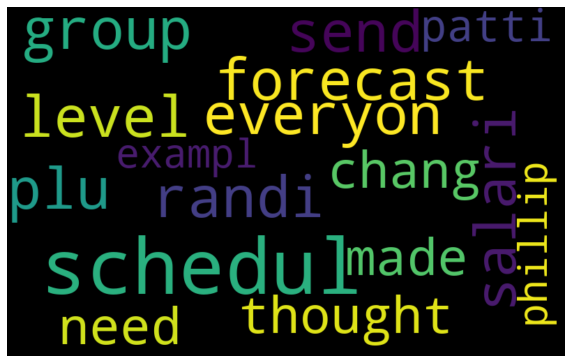

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

normal_words =' '.join([text for text in df['rating'][df['neutral'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

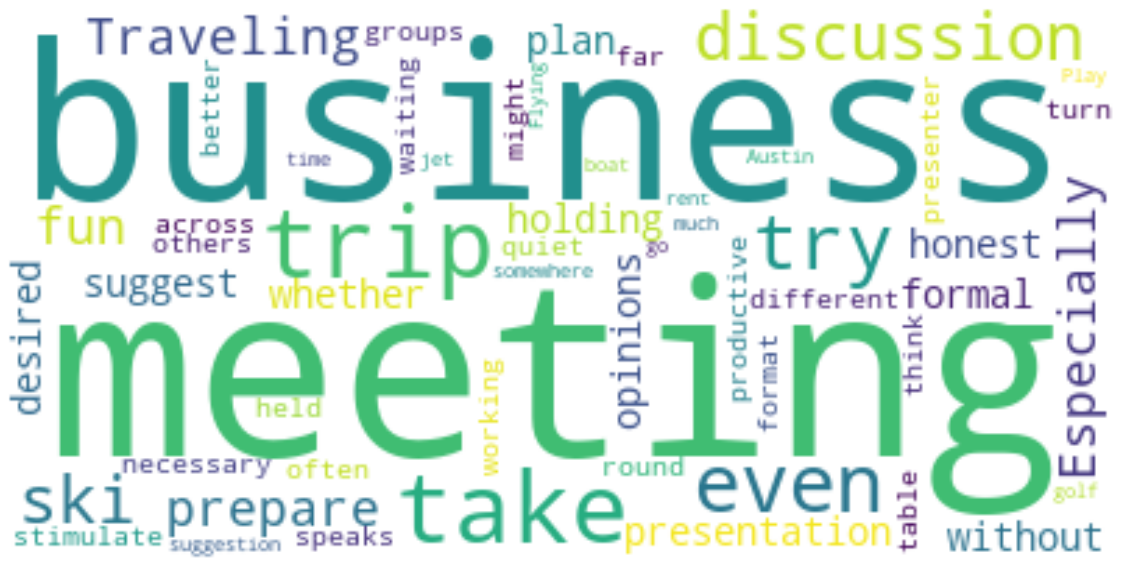

In [0]:
wordcloud_spam = WordCloud(background_color="white").generate(emails)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()